# Data Frame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib.dates as mdates

C:\Users\USER\AppData\Local\Temp\ipykernel_17604\3805544867.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file = "Deposits_Data.xlsx"
df = pd.read_excel(file)

In [3]:
df

,AffiliateID,UserID,Country,Deposit amount (EUR),Deposit date
0,123,2345,Estonia,20,2022-09-01 18:00
1,123,2345,Estonia,30,2022-09-09 16:00
2,123,2345,Estonia,50,2022-09-17 8:00
3,123,2345,Estonia,200,2022-09-24 15:00
4,123,2345,Estonia,30,2022-09-29 20:00
...,...,...,...,...,...
348,125,1249,Sweden,150,2022-09-25 18:00
349,125,1249,Sweden,200,2022-09-27 19:00
350,125,1249,Sweden,100,2022-09-30 21:00
351,123,1246,Sweden,120,2022-09-31 15:00


# Data Inspection and Cleaning

In [4]:
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AffiliateID           353 non-null    int64 
 1   UserID                353 non-null    int64 
 2   Country               353 non-null    object
 3   Deposit amount (EUR)  353 non-null    int64 
 4   Deposit date          353 non-null    object
dtypes: int64(3), object(2)
memory usage: 13.9+ KB


(   AffiliateID  UserID  Country  Deposit amount (EUR)      Deposit date
 0          123    2345  Estonia                    20  2022-09-01 18:00
 1          123    2345  Estonia                    30  2022-09-09 16:00
 2          123    2345  Estonia                    50   2022-09-17 8:00
 3          123    2345  Estonia                   200  2022-09-24 15:00
 4          123    2345  Estonia                    30  2022-09-29 20:00,
 None,
        AffiliateID       UserID  Deposit amount (EUR)
 count   353.000000   353.000000            353.000000
 mean    123.631728  1937.543909            167.844193
 std       0.822490   959.115202            231.097827
 min     123.000000  1230.000000             20.000000
 25%     123.000000  1236.000000             60.000000
 50%     123.000000  1245.000000            100.000000
 75%     124.000000  3456.000000            190.000000
 max     125.000000  3466.000000           2000.000000)

In [5]:
# Checking the data again,
missing_data = df.isnull().sum()
data_types = df.dtypes

missing_data, data_types

(AffiliateID             0
 UserID                  0
 Country                 0
 Deposit amount (EUR)    0
 Deposit date            0
 dtype: int64,
 AffiliateID              int64
 UserID                   int64
 Country                 object
 Deposit amount (EUR)     int64
 Deposit date            object
 dtype: object)

In [6]:
# Convert 'Deposit date' to datetime format
df['Deposit date'] = pd.to_datetime(df['Deposit date'])

# Display the first few rows to confirm the changes and data types
df.head(), df.info()

ValueError: day is out of range for month, at position 130. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df.iloc[130][['Deposit date']]
# 31 September invalid date 

In [7]:
# Modify the function to return the date if valid, or np.nan if not
def validate_date(date):
    try:
        # Returns the date if it's valid
        return pd.to_datetime(date)
    except ValueError:
        # Returns NaN if the date is not valid
        return np.nan

# Apply the function to create a new column with validated dates
df['Valid_Deposit_Date'] = df['Deposit date'].apply(validate_date)

# This line prints out the DataFrame to see the new column with valid dates or NaN for invalid dates
print(df[['Deposit date', 'Valid_Deposit_Date']])
df['Valid_Deposit_Date']
df

         Deposit date  Valid_Deposit_Date
0    2022-09-01 18:00 2022-09-01 18:00:00
1    2022-09-09 16:00 2022-09-09 16:00:00
2     2022-09-17 8:00 2022-09-17 08:00:00
3    2022-09-24 15:00 2022-09-24 15:00:00
4    2022-09-29 20:00 2022-09-29 20:00:00
..                ...                 ...
348  2022-09-25 18:00 2022-09-25 18:00:00
349  2022-09-27 19:00 2022-09-27 19:00:00
350  2022-09-30 21:00 2022-09-30 21:00:00
351  2022-09-31 15:00                 NaT
352   2022-09-32 8:00                 NaT

[353 rows x 2 columns]


,AffiliateID,UserID,Country,Deposit amount (EUR),Deposit date,Valid_Deposit_Date
0,123,2345,Estonia,20,2022-09-01 18:00,2022-09-01 18:00:00
1,123,2345,Estonia,30,2022-09-09 16:00,2022-09-09 16:00:00
2,123,2345,Estonia,50,2022-09-17 8:00,2022-09-17 08:00:00
3,123,2345,Estonia,200,2022-09-24 15:00,2022-09-24 15:00:00
4,123,2345,Estonia,30,2022-09-29 20:00,2022-09-29 20:00:00
...,...,...,...,...,...,...
348,125,1249,Sweden,150,2022-09-25 18:00,2022-09-25 18:00:00
349,125,1249,Sweden,200,2022-09-27 19:00,2022-09-27 19:00:00
350,125,1249,Sweden,100,2022-09-30 21:00,2022-09-30 21:00:00
351,123,1246,Sweden,120,2022-09-31 15:00,NaT


# Calculate Descriptive Statistics:

In [8]:
# Basic descriptive statistics
total_deposits = df['Deposit amount (EUR)'].sum()
average_deposit = df['Deposit amount (EUR)'].mean()
min_deposit = df['Deposit amount (EUR)'].min()
max_deposit = df['Deposit amount (EUR)'].max()

# Count deposits per country
deposits_per_country = df['Country'].value_counts()

# Count deposits per user
deposits_per_user = df['UserID'].value_counts()

print(f"Total Deposits: {total_deposits}")
print(f"Average Deposit: {average_deposit}")
print(f"Minimum Deposit: {min_deposit}")
print(f"Maximum Deposit: {max_deposit}")
print("Deposits per Country:")
print(deposits_per_country)
print("Deposits per User:")
print(deposits_per_user)

Total Deposits: 59249
Average Deposit: 167.8441926345609
Minimum Deposit: 20
Maximum Deposit: 2000
Deposits per Country:
Country
Sweden     221
Finland     90
Estonia     42
Name: count, dtype: int64
Deposits per User:
UserID
1234    31
1246    12
1232    11
1230    11
1249    10
1239    10
1236    10
1235    10
1233    10
1240    10
3465    10
1238    10
1248    10
1245    10
1244    10
1243    10
1241    10
1242     9
1231     9
1237     9
1247     9
3461     9
3459     9
3464     9
3463     9
3462     9
3460     9
3456     8
3457     8
3458     8
2345     5
2346     5
2354     4
2353     4
2352     4
2351     4
2350     4
2349     4
2348     4
2347     4
3466     2
Name: count, dtype: int64


# Visualization


In [9]:
# Group data by hour and country for hourly analysis
hourly_country_data = df.groupby(['Hour', 'Country'])['Deposit amount (EUR)'].sum().unstack()
hourly_country_data.plot(kind='line', figsize=(14, 7), title='Hourly Deposit Trends by Country')
plt.xlabel('Hour of Day')
plt.ylabel('Total Deposit Amount')
plt.grid(True)
plt.legend(title='Country')
plt.show()

# Group data by day of the week and country for weekly analysis
df['DayOfWeek'] = df['Valid_Deposit_Date'].dt.day_name()
weekly_country_data = df.groupby(['DayOfWeek', 'Country'])['Deposit amount (EUR)'].sum().unstack()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_country_data = weekly_country_data.reindex(order)
weekly_country_data.plot(kind='bar', figsize=(14, 7), title='Weekly Deposit Trends by Country')
plt.xlabel('Day of Week')
plt.ylabel('Total Deposit Amount')
plt.grid(True)
plt.legend(title='Country')
plt.show()

KeyError: 'Hour'

In [ ]:

df['Valid_Deposit_Date'] = pd.to_datetime(df['Deposit date'], errors='coerce')
df.dropna(subset=['Valid_Deposit_Date'], inplace=True)

# Aggregate by day
daily_data = df.groupby(df['Valid_Deposit_Date'].dt.date)['Deposit amount (EUR)'].sum().reset_index()
daily_data['Valid_Deposit_Date'] = pd.to_datetime(daily_data['Valid_Deposit_Date'])

# Plotting daily aggregated deposits
plt.figure(figsize=(14, 7))
plt.plot(daily_data['Valid_Deposit_Date'], daily_data['Deposit amount (EUR)'], marker='o', linestyle='-', color='blue')
plt.title('Daily Aggregated Deposits Over Time')
plt.xlabel('Valid Deposit Date')
plt.ylabel('Total Deposit Amount (EUR)')
plt.grid(True)

# Set x-axis format and extend limits
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Ensure a tick every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Auto formats the x-axis labels to fit them better
plt.xlim([daily_data['Valid_Deposit_Date'].min() - pd.Timedelta(days=2), 
          daily_data['Valid_Deposit_Date'].max() + pd.Timedelta(days=2)])  # Extend x-axis limits

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['Valid_Deposit_Date'] = pd.to_datetime(df['Deposit date'], errors='coerce')
df.dropna(subset=['Valid_Deposit_Date'], inplace=True)

# Group data by date and country, then sum the deposits
country_daily_data = df.groupby([df['Valid_Deposit_Date'].dt.date, 'Country'])['Deposit amount (EUR)'].sum().unstack(fill_value=0)

# Reset index to turn the date index back into a column
country_daily_data.reset_index(inplace=True)
country_daily_data['Valid_Deposit_Date'] = pd.to_datetime(country_daily_data['Valid_Deposit_Date'])

# Plotting deposits by country over time
plt.figure(figsize=(16, 8))
for country in country_daily_data.columns[1:]:  # Skip the first column which is the date
    plt.plot(country_daily_data['Valid_Deposit_Date'], country_daily_data[country], marker='', linestyle='-', label=country)

plt.title('Daily Deposits by Country Over Time')
plt.xlabel('Date')
plt.ylabel('Deposit Amount (EUR)')
plt.legend(title='Country')
plt.grid(True)

# Set x-axis format and extend limits
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Ensure a tick every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Auto formats the x-axis labels to fit them better
plt.xlim([country_daily_data['Valid_Deposit_Date'].min() - pd.Timedelta(days=2), 
          country_daily_data['Valid_Deposit_Date'].max() + pd.Timedelta(days=2)])  # Extend x-axis limits

plt.show()


# Visualize the Data

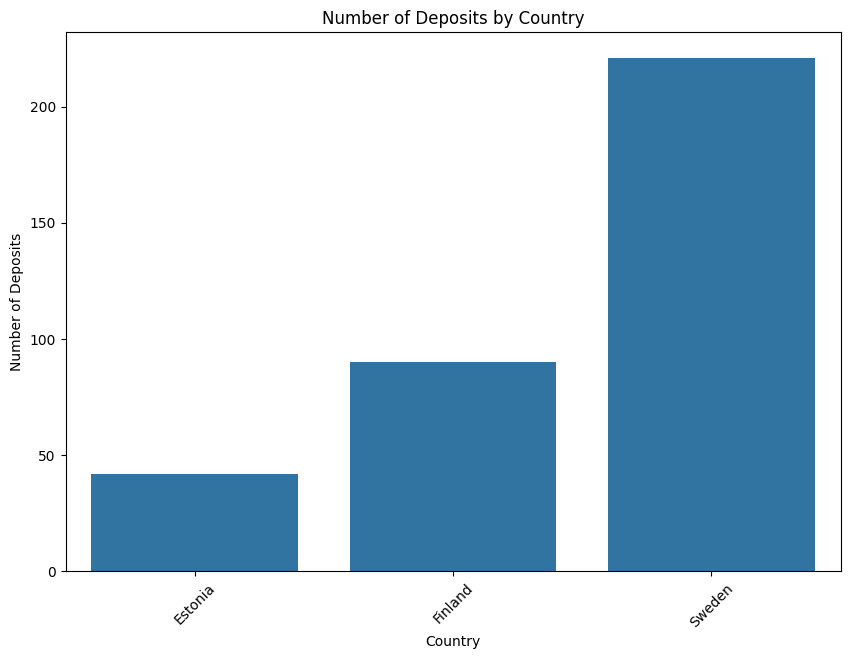

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Bar chart of deposits per country
plt.figure(figsize=(10, 7))
sns.countplot(x='Country', data=df)
plt.title('Number of Deposits by Country')
plt.xlabel('Country')
plt.ylabel('Number of Deposits')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Aggregate total deposits by each affiliate
affiliate_total_deposits = df.groupby('AffiliateID')['Deposit amount (EUR)'].sum().sort_values(ascending=False)
affiliate_total_deposits.head(10)

AffiliateID
123    43449
125     9295
124     6505
Name: Deposit amount (EUR), dtype: int64

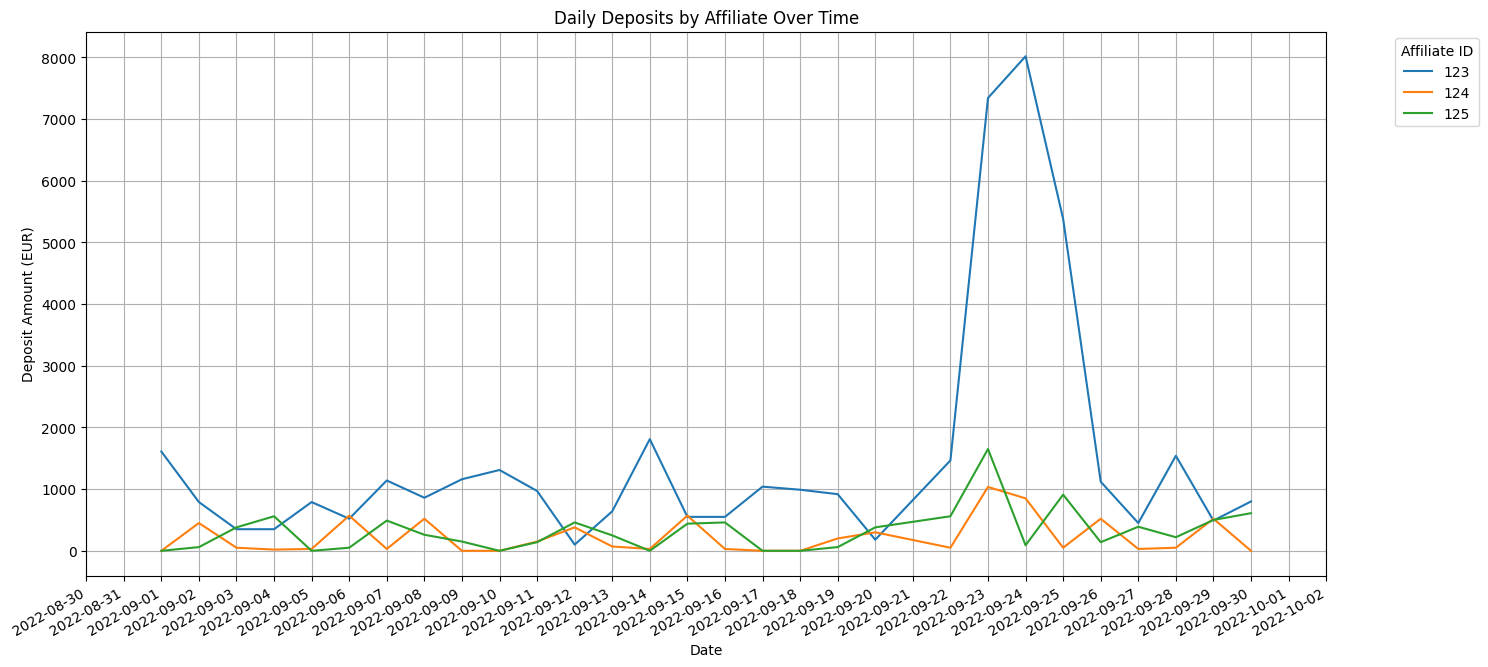

In [12]:


df['Valid_Deposit_Date'] = pd.to_datetime(df['Deposit date'], errors='coerce')
df.dropna(subset=['Valid_Deposit_Date'], inplace=True)

# Group data by date and affiliate, then sum the deposits
affiliate_daily_data = df.groupby([df['Valid_Deposit_Date'].dt.date, 'AffiliateID'])['Deposit amount (EUR)'].sum().unstack(fill_value=0)

affiliate_daily_data.reset_index(inplace=True)
affiliate_daily_data['Valid_Deposit_Date'] = pd.to_datetime(affiliate_daily_data['Valid_Deposit_Date'])

# Plotting daily deposits by affiliate
plt.figure(figsize=(16, 8))
for affiliate in affiliate_daily_data.columns[1:]:  # Skip the date column
    plt.plot(affiliate_daily_data['Valid_Deposit_Date'], affiliate_daily_data[affiliate], marker='', linestyle='-', label=str(affiliate))

plt.title('Daily Deposits by Affiliate Over Time')
plt.xlabel('Date')
plt.ylabel('Deposit Amount (EUR)')
plt.legend(title='Affiliate ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Set x-axis format and extend limits
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Ensure a tick every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Auto formats the x-axis labels to fit them better
plt.xlim([affiliate_daily_data['Valid_Deposit_Date'].min() - pd.Timedelta(days=2), 
          affiliate_daily_data['Valid_Deposit_Date'].max() + pd.Timedelta(days=2)])  # Extend x-axis limits

plt.show()

In [13]:
# Aggregate total deposits by each affiliate
affiliate_deposits_summary = df.groupby('AffiliateID')['Deposit amount (EUR)'].agg(['sum', 'count']).rename(columns={'sum': 'Total Deposits', 'count': 'Total Transactions'})
affiliate_user_counts = df.groupby('AffiliateID')['UserID'].nunique()

# Combine the summaries
affiliate_summary = affiliate_deposits_summary.join(affiliate_user_counts.rename('Unique Users'))

affiliate_repeat_depositors = df[df.duplicated(['UserID'], keep=False)].groupby('AffiliateID')['UserID'].nunique()

affiliate_summary = affiliate_summary.join(affiliate_repeat_depositors.rename('Repeat Depositors'))

# Calculate new depositors (total unique users - repeat depositors)
affiliate_summary['New Depositors'] = affiliate_summary['Unique Users'] - affiliate_summary['Repeat Depositors']

# Display the summarized data
print(affiliate_summary)

             Total Deposits  Total Transactions  Unique Users  \
AffiliateID                                                     
123                   43229                 206            21   
124                    6505                  67            11   
125                    9210                  76             8   

             Repeat Depositors  New Depositors  
AffiliateID                                     
123                         21               0  
124                         11               0  
125                          8               0  


In [14]:
df['Is Repeat'] = df.duplicated('UserID', keep=False)

# Taggregate by AffiliateID
affiliate_user_summary = df.groupby('AffiliateID').agg({
    'UserID': 'nunique',  # count unique users
    'Is Repeat': 'sum'    # sum the True values marked as repeat
}).rename(columns={'UserID': 'Total Users', 'Is Repeat': 'Repeat Depositors'})

print(affiliate_user_summary)

             Total Users  Repeat Depositors
AffiliateID                                
123                   21                206
124                   11                 67
125                    8                 76


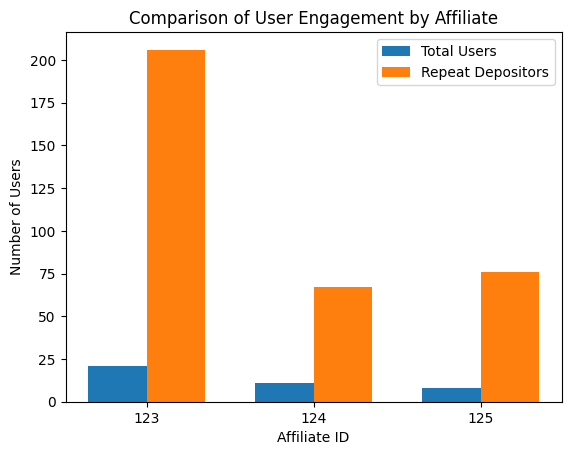

In [15]:
# Prepare the data for plotting
affiliates = affiliate_user_summary.index
total_users = affiliate_user_summary['Total Users']
repeat_depositors = affiliate_user_summary['Repeat Depositors']

# Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(affiliates))

bar1 = ax.bar(index, total_users, bar_width, label='Total Users')
bar2 = ax.bar([p + bar_width for p in index], repeat_depositors, bar_width, label='Repeat Depositors')

ax.set_xlabel('Affiliate ID')
ax.set_ylabel('Number of Users')
ax.set_title('Comparison of User Engagement by Affiliate')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(affiliates)
ax.legend()

plt.show()

# Implementation Steps:
## Step 1: Hourly Trends

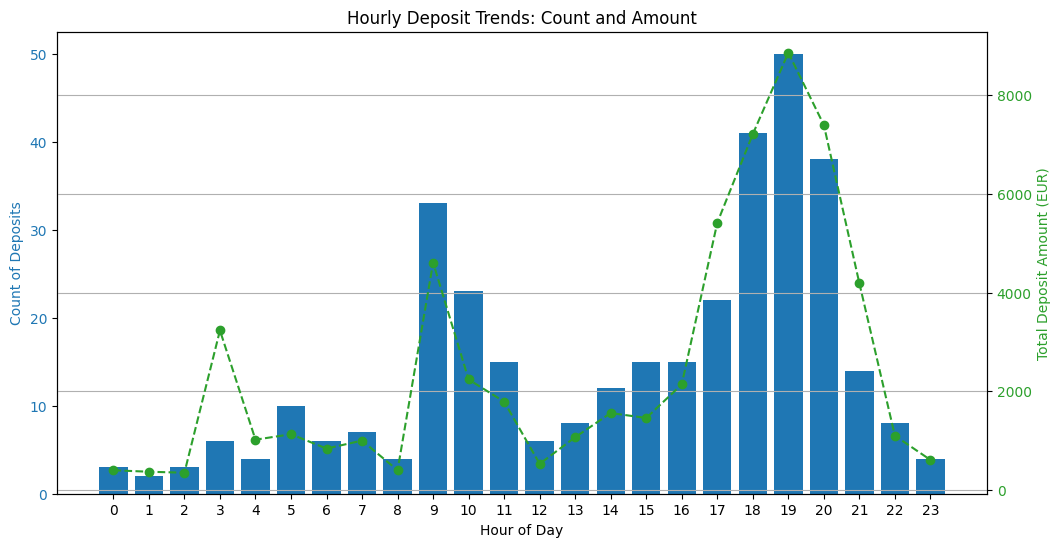

In [21]:
df['Hour'] = df['Valid_Deposit_Date'].dt.hour
hourly_deposits = df.groupby('Hour')['Deposit amount (EUR)'].agg(['count', 'sum'])

# Plotting with separate axes for clarity
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for count
color = 'tab:blue'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Count of Deposits', color=color)
ax1.bar(hourly_deposits.index, hourly_deposits['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Twin axis for sum
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Total Deposit Amount (EUR)', color=color)  # we already handled the x-label with ax1
ax2.plot(hourly_deposits.index, hourly_deposits['sum'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Final adjustments
plt.title('Hourly Deposit Trends: Count and Amount')
plt.grid(True)
plt.xticks(hourly_deposits.index)  
plt.show()

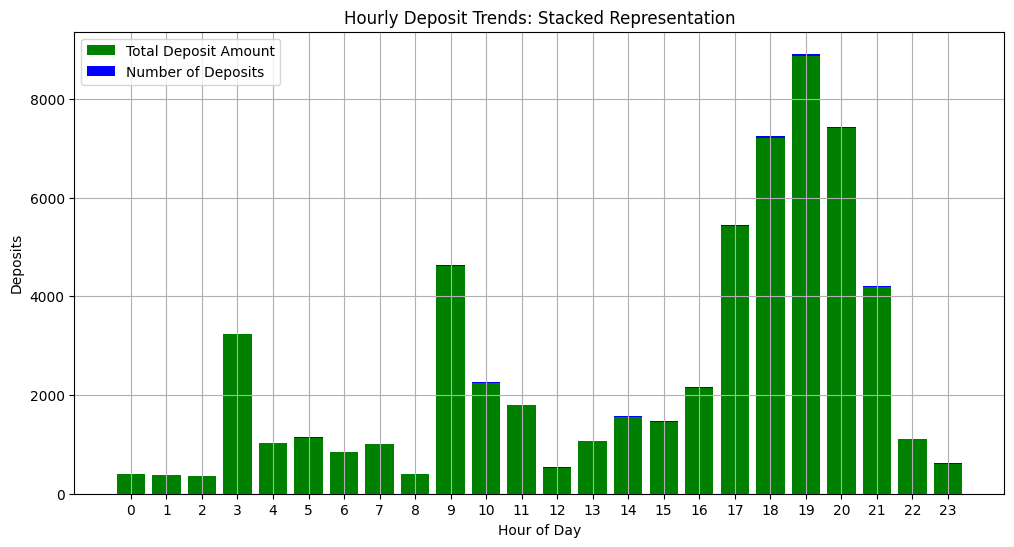

In [42]:
hourly_deposits = df.groupby('Hour')['Deposit amount (EUR)'].agg(['count', 'sum'])

# Plotting a stacked bar chart for clarity
plt.figure(figsize=(12, 6))
plt.bar(hourly_deposits.index, hourly_deposits['sum'], color='green', label='Total Deposit Amount')
plt.bar(hourly_deposits.index, hourly_deposits['count'], bottom=hourly_deposits['sum'], color='blue', label='Number of Deposits')
plt.title('Hourly Deposit Trends: Stacked Representation')
plt.xlabel('Hour of Day')
plt.ylabel('Deposits')
plt.legend()
plt.grid(True)
plt.xticks(hourly_deposits.index)  
plt.show()

# Weekly Trends
## Analyze deposits based on the day of the week.

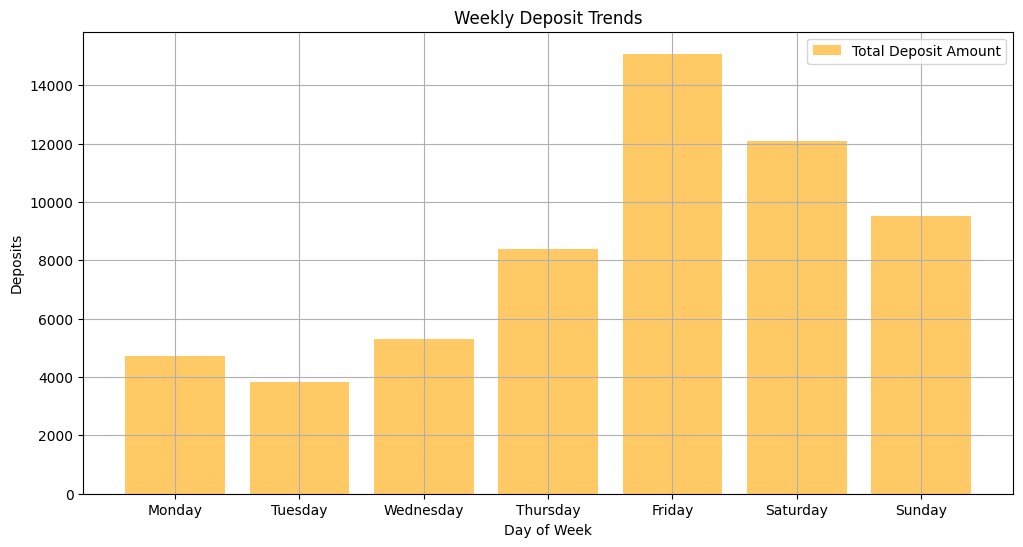

In [28]:
# Extract day of the week from the deposit date
df['DayOfWeek'] = df['Valid_Deposit_Date'].dt.day_name()

# Aggregate deposits by day of the week
weekly_deposits = df.groupby('DayOfWeek')['Deposit amount (EUR)'].agg(['count', 'sum'])

# Reorder the days starting from Monday
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_deposits = weekly_deposits.reindex(order)

# Plotting weekly trends
plt.figure(figsize=(12, 6))

plt.bar(weekly_deposits.index, weekly_deposits['sum'], color='orange', label='Total Deposit Amount', alpha=0.6)
plt.title('Weekly Deposit Trends')
plt.xlabel('Day of Week')
plt.ylabel('Deposits')
plt.legend()
plt.grid(True)
plt.show()


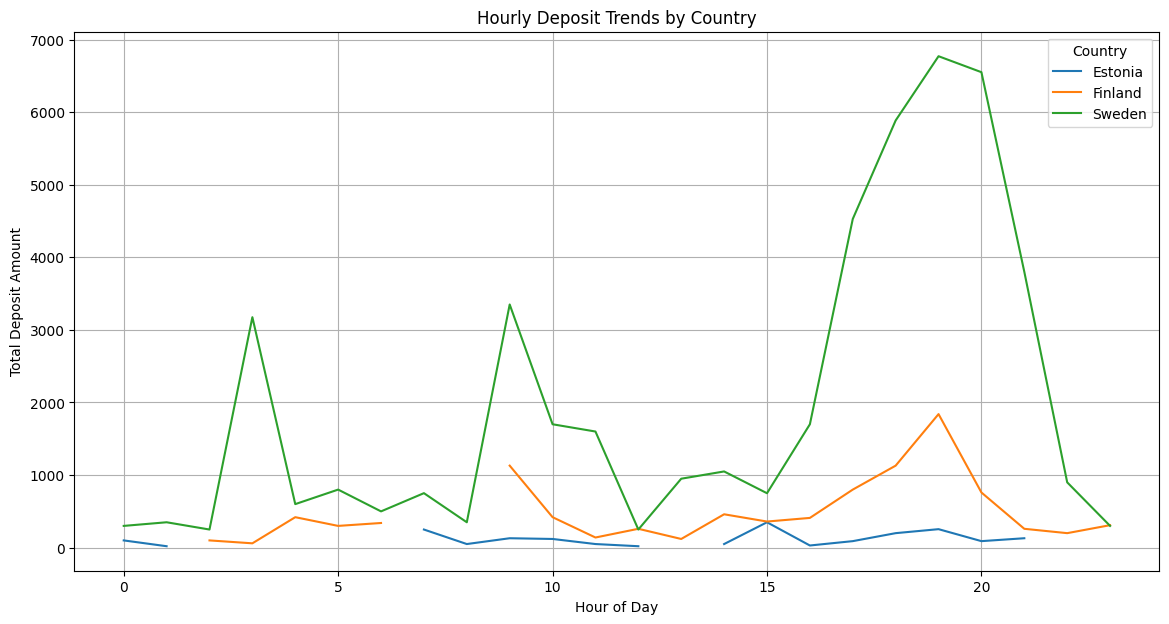

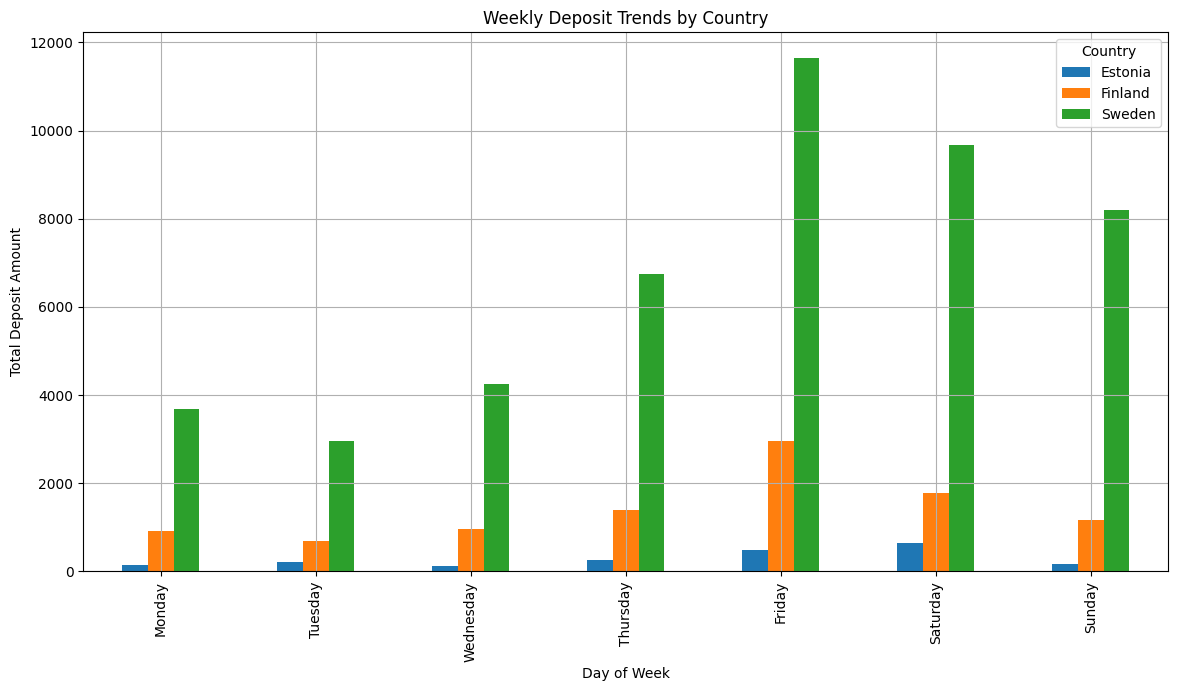

In [29]:
# Group data by hour and country for hourly analysis
hourly_country_data = df.groupby(['Hour', 'Country'])['Deposit amount (EUR)'].sum().unstack()
hourly_country_data.plot(kind='line', figsize=(14, 7), title='Hourly Deposit Trends by Country')
plt.xlabel('Hour of Day')
plt.ylabel('Total Deposit Amount')
plt.grid(True)
plt.legend(title='Country')
plt.show()

# Group data by day of the week and country for weekly analysis
df['DayOfWeek'] = df['Valid_Deposit_Date'].dt.day_name()
weekly_country_data = df.groupby(['DayOfWeek', 'Country'])['Deposit amount (EUR)'].sum().unstack()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_country_data = weekly_country_data.reindex(order)
weekly_country_data.plot(kind='bar', figsize=(14, 7), title='Weekly Deposit Trends by Country')
plt.xlabel('Day of Week')
plt.ylabel('Total Deposit Amount')
plt.grid(True)
plt.legend(title='Country')
plt.show()

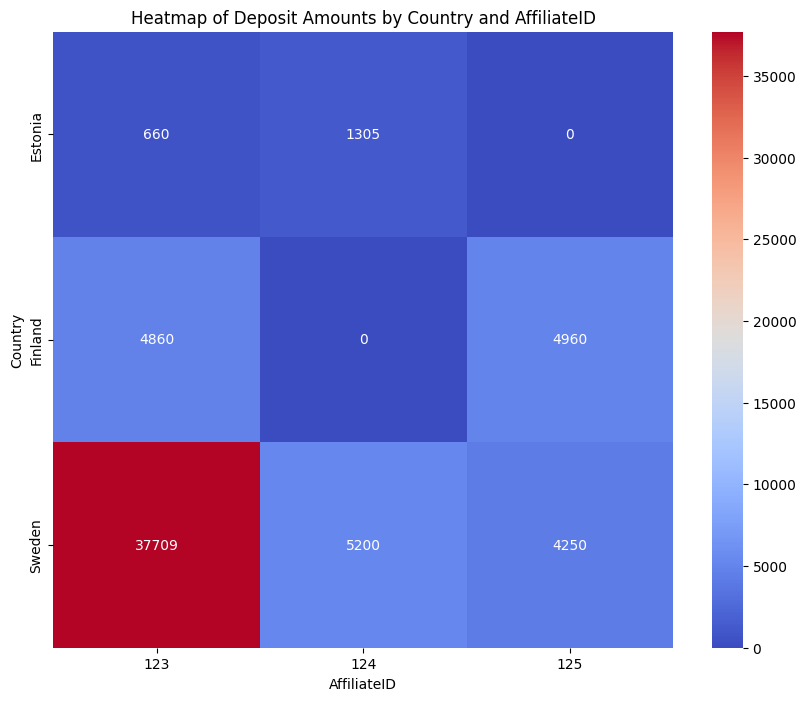

In [22]:



grouped_data = df.groupby(['Country', 'AffiliateID'])['Deposit amount (EUR)'].sum().unstack(fill_value=0)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt="g")
plt.title('Heatmap of Deposit Amounts by Country and AffiliateID')
plt.ylabel('Country')
plt.xlabel('AffiliateID')
plt.show()

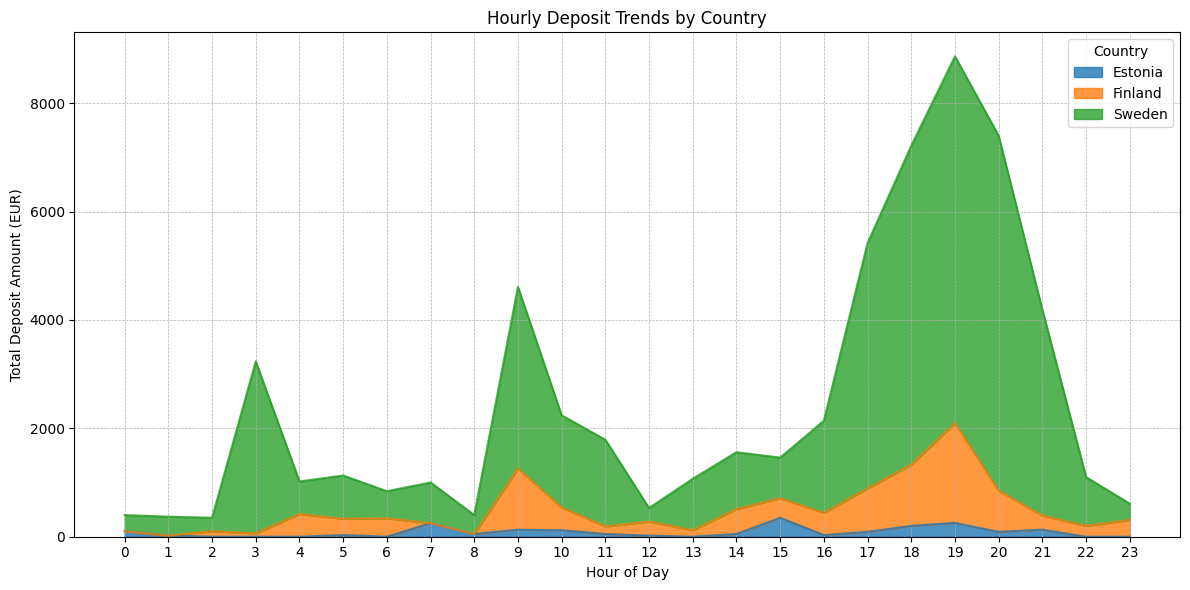

In [24]:
pivot_df = df.pivot_table(index='Hour', columns='Country', values='Deposit amount (EUR)', aggfunc='sum')

# Plotting the data as a stacked area chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='area', stacked=True, alpha=0.8, ax=ax)
ax.set_title('Hourly Deposit Trends by Country')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Total Deposit Amount (EUR)')
plt.xticks(range(0, 24))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Country')
plt.tight_layout()
plt.show()